<a href="https://colab.research.google.com/github/lstarke/pytoch-beginner-examples/blob/main/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [13]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

epoch 10: w = 12.283, loss = 4369.70849609
epoch 20: w = 22.607, loss = 3259.96459961
epoch 30: w = 31.405, loss = 2457.19506836
epoch 40: w = 38.903, loss = 1875.85534668
epoch 50: w = 45.295, loss = 1454.44519043
epoch 60: w = 50.745, loss = 1148.68286133
epoch 70: w = 55.392, loss = 926.64117432
epoch 80: w = 59.356, loss = 765.26873779
epoch 90: w = 62.738, loss = 647.90350342
epoch 100: w = 65.623, loss = 562.48712158


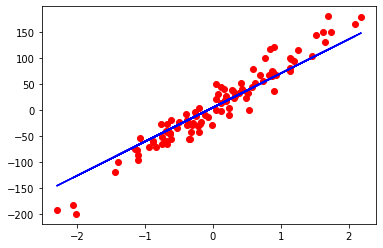

In [17]:
n_samples, n_features = x.shape

input_size = n_features
output_size =  n_features

model = nn.Linear(input_size, output_size)

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epoch = 100
for epoch in range(num_epoch):
  y_pred = model(x)
  loss = criterion(y_pred, y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0]:.3f}, loss = {loss:.8f}')

predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()